In [3]:
#!/usr/bin/evn python3
# coding=utf-8

# 使用该魔法，不用写plt.show()
%matplotlib inline  

import warnings
# 忽略警告提示
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

import seaborn as sns



# 导入训练数据
# data = pd.read_csv('./data/train.csv')
# data = pd.DataFrame.from_csv('./data/train.csv')
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/train.csv')

#数据信息总览：
train_data.info()
print("-" * 40)
test_data.info()

# 查看数据大小
print('train data',train_data.shape[0],'row,',train_data.shape[1],'colum')

# 观察数据结构，返回前6行
train_data.head(6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [2]:
'''
表格说明

PassengerId： 乘客编号
Survived：是否生存，也是我们分析目标。1表示生存，0表示死亡
Pclass：船舱等级 分1、2、3等级，1等级最高
Name：乘客姓名
Sex：性别
Age：年龄
SibSp：该乘客一起旅行的兄弟姐妹和配偶的数量(同代直系亲属人数)
Parch：该和乘客一起旅行的父母和孩子的数量(不同代直系亲属人数)
Ticket：船票号
Fare：船票价格
Cabin：船舱号
Embarked：登船港口 
S=英国南安普顿Southampton(起航点) 
C=法国 瑟堡市Cherbourg(途经点) 
Q=爱尔兰 昆士敦Queenstown(途经点)

'''

# 数据描述
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


绘制存活的比例：

<class 'pandas.core.series.Series'>


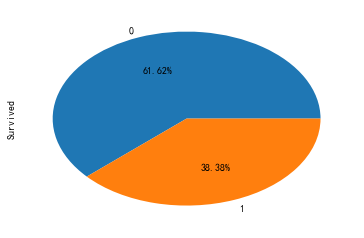

In [5]:
print(type(train_data['Survived'].value_counts()))
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')


上表中看到年龄(Age)列只有714行，缺失了105行。所以我们要对缺失值进行处理。

考虑到年龄最小值是0.42，最大值80，这里用中位数填充缺失值，因为中位数不受极端变量值的影响。

In [7]:
# 年龄缺失值处理
train_data['Age']=train_data['Age'].fillna( train_data['Age'].median())     # 用中位数填充
# data['Age']=data['Age'].fillna( data['Age'].meann())    # 用平均数填充


现在数据就比较完整了，接下来开始一些简单分析。

首先查看下哪个特征相关性最大

In [9]:
# pearson相关系数
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


看到Survived与船舱等级(Pclass)相关
值最高，船票(Fare)次之，Parch第三，Age第四
pearson相关系数只能查看数据类型的描述统计信息，对于其他类型的数据不显示，所以还要加上特征，性别(sex)、名字(Name)

船舱等级(Pclass)与存活关系

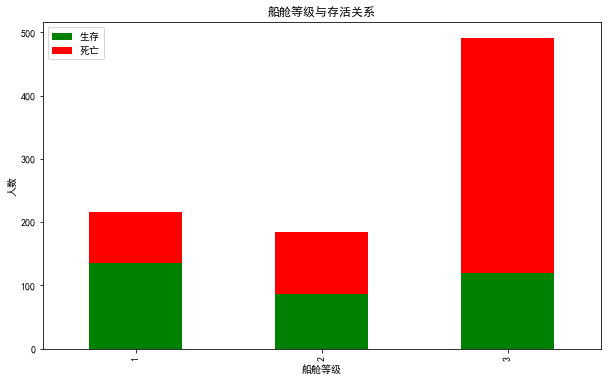

In [10]:
# 添加死亡标签
train_data['Died'] = 1 - train_data['Survived']
# 按船舱等级(Pclass)分组，再汇总
train_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 6),stacked=True, colors=['g', 'r'])
plt.title('船舱等级与存活关系')
plt.xlabel('船舱等级')
plt.ylabel('人数')
plt.legend(['生存', '死亡'], loc='upper left')

船票价格(Fare)与存活关系

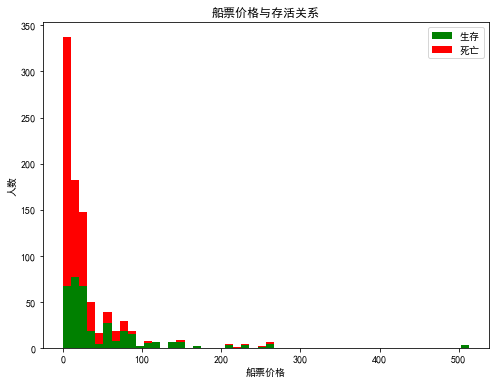

In [11]:
# 按船票价格(Fare)分组，再汇总
figure = plt.figure(figsize=(8,6))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'],train_data[train_data['Survived'] == 0]['Fare']],stacked=True, color = ['g','r'],
         bins = 50, label = ['生存','死亡'])
plt.title('船票价格与存活关系')
plt.xlabel('船票价格')
plt.ylabel('人数')
plt.legend()

家庭成员数与存活关系

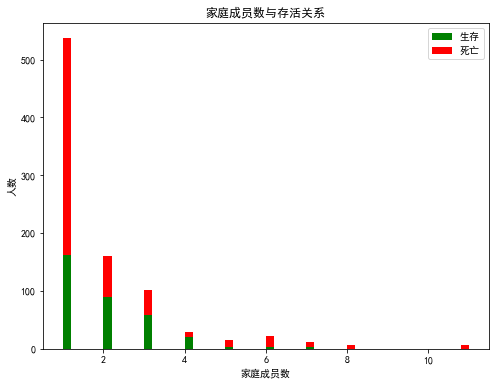

In [12]:
# 家庭人数 ＝ Parch+SibSp+自己
figure = plt.figure(figsize=(8, 6))
plt.hist([train_data[train_data['Survived'] == 1]['Parch']+ train_data[train_data['Survived'] == 1]['SibSp']+1, 
          train_data[train_data['Survived'] == 0]['Parch']+train_data[train_data['Survived'] == 0]['SibSp']+1], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['生存','死亡'])
plt.title('家庭成员数与存活关系')
plt.xlabel('家庭成员数')
plt.ylabel('人数')
plt.legend();

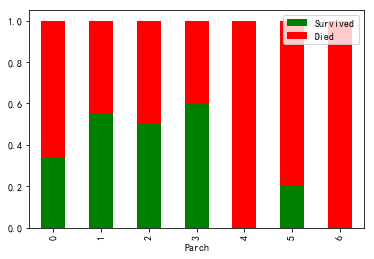

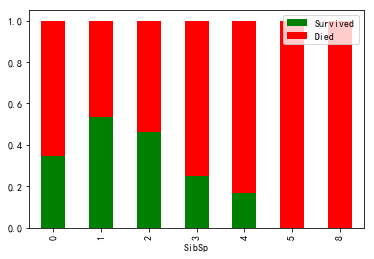

In [13]:
# 家庭成员数与生存的关系

train_data.groupby('Parch').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                           stacked=True, colors=['g', 'r'])

train_data.groupby('SibSp').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                           stacked=True, colors=['g', 'r'])

乘客年龄与存活关系

Text(0,0.5,'年龄')

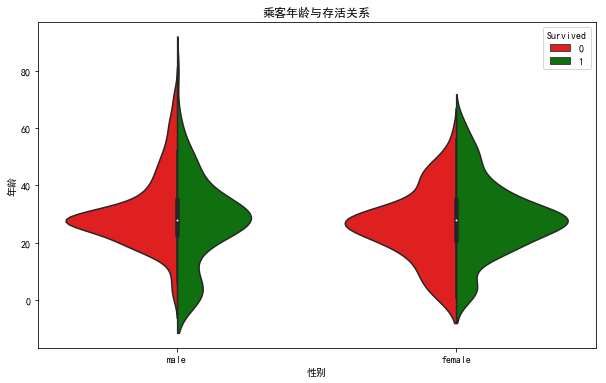

In [15]:
fig = plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, 
               split=True,palette={0: "r", 1: "g"} )
plt.title('乘客年龄与存活关系')
plt.xlabel('性别')
plt.ylabel('年龄')

性别与存活关系

Text(0,0.5,'比例')

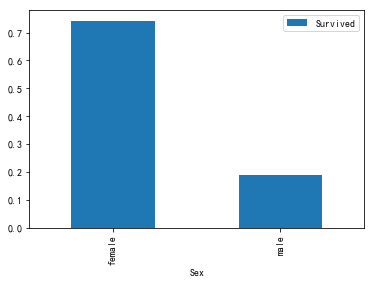

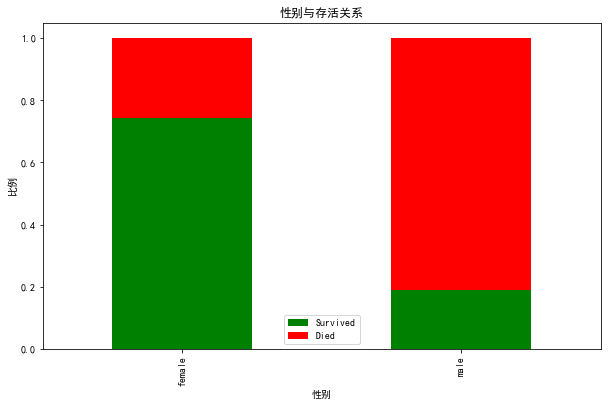

In [33]:
# 按性别(Sex)分组

train_data.groupby(['Sex','Survived'])['Survived'].count()
# train_data.groupby(['Sex','Survived']).count()
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 6), 
                                                           stacked=True, colors=['g', 'r'])
plt.title('性别与存活关系')
plt.xlabel('性别')
plt.ylabel('比例')


分析了各个特征与生存的关系，我们再综合几个特征看下。

### 年龄、船票价格与存活关系

Text(0.5,1,'年龄、船票价格与存活关系')

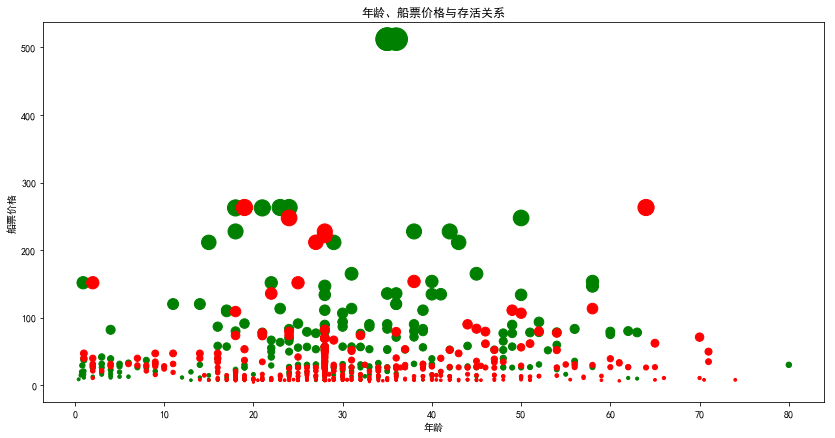

In [13]:
# 圆的大小表示票价的高低
plt.figure(figsize=(14,7))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'], c='g', s=data[data['Survived']==1]['Fare'])
ax.scatter(data[data['Died']==1]['Age'], data[data['Died']==1]['Fare'], c='r', s=data[data['Died']==1]['Fare'])
ax.set_xlabel('年龄')
ax.set_ylabel('船票价格')
ax.set_title('年龄、船票价格与存活关系')

<class 'pandas.core.groupby.DataFrameGroupBy'>


Text(0,0.5,'平均船票价格')

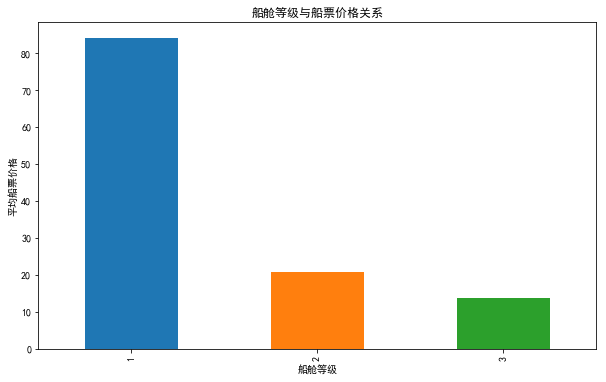

In [31]:
# 按船舱等级分组
print(type(train_data.groupby('Pclass')))
train_data.groupby('Pclass')['Fare'].agg('mean').plot(kind='bar', figsize=(10,6))
plt.title('船舱等级与船票价格关系')
plt.xlabel('船舱等级')
plt.ylabel('平均船票价格')

通过对各个特征分析，我们可以得出以下几个结论：

船票价格高的，也就是舰艇等级高的存活率高。
女性比男性存活率高。
小孩(10岁以下)和老人(50岁以下)存活率比青壮年比例高。
购买高票价的人主要集中在15－50岁这个区间。
家庭成员数2－4个人的存活率高于其它家庭情况。
由此，我们可以得出，幸存下来的人不仅仅是运气好。还和他们的经济能力、社会地位、年龄、家庭情况等密切相关。那么现在我给你一个乘客的资料，能判断他或她的生存或死亡吗，很遗憾的告诉你，不能。

为什么？之前我们做的都是无用功了吗？骚年，别急。来，喝口茶，我们继续分析。

In [15]:
# 看下表的结构
cols = train_data.columns
print(cols)
print('该数据特征总个有：',len(cols))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Died'],
      dtype='object')
该数据特征总个有： 13


4. 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。

所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。

所有的数据可以分为两类：

1.定性(Quantitative)变量可以以某种方式排序，Age就是一个很好的列子。
2.定量(Qualitative)变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。
定性(Qualitative)转换：

1. Dummy Variables

就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适合使用。我们以Embarked为例，Embarked只包含三个值'S','C','Q'，我们可以使用下面的代码将其转换为dummies:

In [43]:
embark_dummies  = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1,inplace=True)
embark_dummies = train_data[['S', 'C', 'Q']]
embark_dummies.head()
# train_data.head(6)

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


2. Factorizing

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征。

In [46]:
import re
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data['CabinLetter'].head()

0    0
1    1
2    0
3    1
4    0
Name: CabinLetter, dtype: int64

定量(Quantitative)转换：

1. Scaling

Scaling可以将一个很大范围的数值映射到一个很小的范围(通常是-1 - 1，或则是0 - 1)，很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数值特征将会由更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果。

下面对Age进行Scaling：

In [49]:
from sklearn import preprocessing
np.size(train_data['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit variance 
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1, 1))
train_data['Age_scaled'].head()

0   -0.565736
1    0.663861
2   -0.258337
3    0.433312
4    0.433312
Name: Age_scaled, dtype: float64



0    0
 1    1
 2    0
 3    1
 4    0
 Name: CabinLetter, dtype: int64



0   -0.558449
 1    0.606773
 2   -0.267144
 3    0.388293
 4    0.388293
 Name: Age_scaled, dtype: float64
2. Binning

Binning通过观察“邻居”(即周围的值)将连续数据离散化。存储的值被分布到一些“桶”或“箱“”中，就像直方图的bin将数据划分成几块一样。下面的代码对Fare进行Binning。

# Divide all fares into quartilestrain_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5)train_data['Fare_bin'].head()
0      (-0.001, 7.854]
 1    (39.688, 512.329]
 2        (7.854, 10.5]
 3    (39.688, 512.329]
 4        (7.854, 10.5]
 Name: Fare_bin, dtype: category
 Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]
在将数据Bining化后，要么将数据factorize化，要么dummies化。

# qcut() creates a new variable that identifies the quartile range, but we can't use the string# so either factorize or create dummies from the result# factorizetrain_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]# dummiesfare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

简单看下该数据有13个特征，去掉PassengerId、Survived也还有11个，而船票价格不同，船舱又分3个等级，性别分男女，家庭成员数及组成，乘客的起始点又不相同等等。可以看出，特征很多，而特征中又包含特征，纬度太高，所以不知道哪个权重比较大，所以就更不能判断生存情况了。

那么有什么办法操作呢，那就是利用特征分析，来进行特征选择，降低纬度。这就是机器学习分析的范畴了。 

Kaggle初体验-机器学习之泰坦尼克号乘客生存预测 https://blog.csdn.net/wuzlun/article/details/80189766
Kaggle初学者五步入门指南，七大诀窍助你享受竞赛 https://blog.csdn.net/u010094934/article/details/77689151